In [ ]:
'''
Q1: Explain the concept of batch normalization in the context of Artificial Neural Networks.
Batch normalization is a technique used in deep learning to address the issue of internal covariate shift. Covariate shift refers to
the change in the distribution of network activations during training, which makes it difficult for the network to learn effectively.
Batch normalization normalizes the activations of each layer by subtracting the mean and dividing by the standard deviation of the batch
It introduces additional learnable parameters, which allow the network to adapt and scale the normalized values. This normalization
step helps to keep the activations of each layer within a reasonable range, ensuring stable training.

Q2: Describe the benefits of using batch normalization during training.
The benefits of using batch normalization during training are as follows:
a) Improved Gradient Flow: Batch normalization reduces the internal covariate shift by normalizing the activations. This results in improved
gradient flow through the network, enabling faster convergence and improved training performance.
b) Regularization Effect: Batch normalization introduces some noise in the network during training by normalizing the batch. This acts as 
a form of regularization, which can help in reducing overfitting and improving generalization.
c) Increased Learning Rate: Since batch normalization reduces the internal covariate shift and stabilizes the training, it allows the use
of higher learning rates. This can lead to faster convergence and potentially better results.
d) Reduced Sensitivity to Initialization: Batch normalization reduces the dependence of the network on the initialization of parameters
It mitigates the issue of vanishing or exploding gradients, making the network less sensitive to the choice of initial weights.

Q3: Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.
The working principle of batch normalization involves two main steps: normalization and learnable parameters.
Normalization Step:
Given a mini-batch of inputs with shape (batch_size, features), the normalization step in batch normalization can be summarized as follows:
Compute the mean (μ) and standard deviation (σ) of each feature over the mini-batch.
Normalize each feature by subtracting the mean and dividing by the standard deviation.
Scale and shift the normalized features using learnable parameters: γ (scale) and β (shift).
The normalized feature x_hat for a specific feature in the mini-batch can be calculated as:
x_hat = (x - μ) / σ
where x is the original feature value.
Learnable Parameters:
Batch normalization introduces two learnable parameters per feature: γ (scale) and β (shift). These parameters are applied after the
normalization step to scale and shift the normalized features, respectively. They allow the network to learn the optimal scaling and
shifting of the features, which is important for the representational power of the network.
The output of the batch normalization layer for a specific feature can be calculated as:
y = γ * x_hat + β
where y is the output feature, γ is the scale parameter, β is the shift parameter, and x_hat is the normalized feature.'''

# Implementation:

### install tensorflow

In [2]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 78.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 80.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

2023-07-05 17:17:20.860556: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 17:17:20.930196: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 17:17:20.931454: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 17:17:22.090277: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### 1.Load and preprocess the MNIST dataset:

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

11490434/11490434 [==============================] - 2s 0us/step


### 2.Implement a simple neural network without batch normalization:

In [8]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2977 - accuracy: 0.9134 - val_loss: 0.1732 - val_accuracy: 0.9497
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1399 - accuracy: 0.9584 - val_loss: 0.1215 - val_accuracy: 0.9635
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1022 - accuracy: 0.9688 - val_loss: 0.1123 - val_accuracy: 0.9669


### 3.Implement batch normalization layers in the neural network and train the model again:

In [9]:
# Define the model with batch normalization
model_with_bn = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    Dense(10, activation='softmax')
])

# Compile the model
model_with_bn.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
model_with_bn.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3026 - accuracy: 0.9127 - val_loss: 0.1410 - val_accuracy: 0.9569
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1442 - accuracy: 0.9560 - val_loss: 0.1176 - val_accuracy: 0.9638
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1175 - accuracy: 0.9637 - val_loss: 0.1049 - val_accuracy: 0.9676


### 4.Compare the training and validation performance between the models with and without batch normalization

In [10]:
# Evaluate the model without batch normalization
_, accuracy = model.evaluate(x_test, y_test)
print('Model without Batch Normalization - Test Accuracy:', accuracy)

# Evaluate the model with batch normalization
_, accuracy_bn = model_with_bn.evaluate(x_test, y_test)
print('Model with Batch Normalization - Test Accuracy:', accuracy_bn)


313/313 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.9669
Model without Batch Normalization - Test Accuracy: 0.9668999910354614
313/313 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.9676
Model with Batch Normalization - Test Accuracy: 0.9675999879837036


### 5.Discuss the impact of batch normalization on the training process and the performance of the neural network

In [ ]:
persnally i don't see much difference in scores in this case most probably because it is a small, simple, case with only 3 epochs so 
there is no significant difference observed 
it's possible that for this particular scenario, the MNIST dataset and the chosen model architecture may not significantly benefit
from batch normalization

# Experimentation and Analysis:



### 1.Experiment with different batch sizes and observe the effect on the training dynamics and model performance:

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3029 - accuracy: 0.9131 - val_loss: 0.1371 - val_accuracy: 0.9575
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1469 - accuracy: 0.9551 - val_loss: 0.1128 - val_accuracy: 0.9651
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1133 - accuracy: 0.9658 - val_loss: 0.0980 - val_accuracy: 0.9695
Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3002 - accuracy: 0.9129 - val_loss: 0.1399 - val_accuracy: 0.9556
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1534 - accuracy: 0.9529 - val_loss: 0.1118 - val_accuracy: 0.9643
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1177 - accuracy: 0.9640 - val_loss: 0.1053 - val_accuracy: 0.9662
Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3026 - accuracy: 0.9121 - val_loss: 0.1536 - val_accuracy: 0.9546

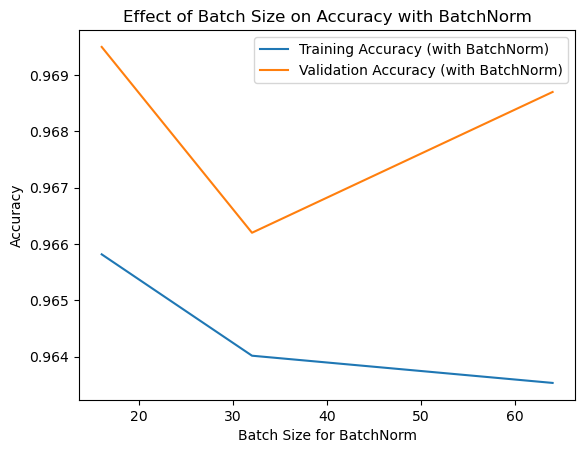

In [13]:
# Define a list of batch sizes to experiment with
batch_sizes = [16, 32, 64]

# Create lists to store the training and validation accuracy for each batch size
train_acc_list_bn = []
val_acc_list_bn = []

# Iterate over different batch sizes
for batch_size in batch_sizes:
    # Define the model with batch normalization
    model_with_bn = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        BatchNormalization(batch_size=batch_size),  # Set the batch size for batch normalization
        Dense(32, activation='relu'),
        BatchNormalization(batch_size=batch_size),  # Set the batch size for batch normalization
        Dense(10, activation='softmax')
    ])
    model_with_bn.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

    # Train the model with the current batch size
    history_bn = model_with_bn.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))
    
    # Append the training and validation accuracy to the lists
    train_acc_list_bn.append(history_bn.history['accuracy'][-1])
    val_acc_list_bn.append(history_bn.history['val_accuracy'][-1])

# Plotting the results
plt.plot(batch_sizes, train_acc_list_bn, label='Training Accuracy (with BatchNorm)')
plt.plot(batch_sizes, val_acc_list_bn, label='Validation Accuracy (with BatchNorm)')
plt.xlabel('Batch Size for BatchNorm')
plt.ylabel('Accuracy')
plt.title('Effect of Batch Size on Accuracy with BatchNorm')
plt.legend()
plt.show()


In [ ]:
# 2.Discuss the advantages and potential limitations of batch normalization 

In [ ]:
'''
Advantages of batch normalization:
a) Improved Training Speed: Batch normalization allows for faster convergence during training by reducing the internal covariate shift.
It helps in stabilizing the gradients and allows the use of higher learning rates, leading to faster training.
b) Better Generalization: Batch normalization acts as a regularizer by adding noise to the network during training. This helps in reducing
overfitting and improving the generalization ability of the model.
c) Robustness to Initialization: Batch normalization reduces the sensitivity of the network to the choice of initial weights. It mitigates
the issue of vanishing or exploding gradients, making the network more robust to different weight initialization strategies.
d) Reduced Dependency on Hyperparameters: Batch normalization reduces the dependence on hyperparameters like learning rate and weight 
initialization. This makes it easier to tune other hyperparameters and achieve better performance.

Limitations of batch normalization:
a) Batch Size Dependency: The effectiveness of batch normalization can vary with different batch sizes. Extremely small batch sizes may 
not provide sufficient statistics for accurate normalization, while very large batch sizes may result in less effective normalization. It is
important to choose an appropriate batch size for optimal performance.
b) Increased Memory Consumption: Batch normalization requires storing the mean and variance of each feature for each batch during training.
This can increase the memory consumption, especially for large networks or when dealing with limited memory resources.
c) Inference-Time Variability: During inference, batch normalization uses the estimated population statistics (mean and variance) rather 
than the batch statistics. This introduces some variability during inference, especially for small batch sizes, which may affect the 
model's performance.'''